In [1]:
import numpy as np
import pandas as pd
import torch
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pickle
from show_img import *

In [2]:
# mode = 'center'
mode = 'random'
results = pd.read_csv('solar_pv_{}_IOU.csv'.format(mode), index_col=0)

In [3]:
results

,img_name,prompt_ind,SAM_conf_0,SAM_conf_1,SAM_conf_2,IoU_0,IoU_1,IoU_2,cur_object_size
0,11ska625740_13_27.tif,0,0.957196,0.943334,0.813330,0.311005,0.592417,0.057815,209
1,11ska565665_04_15.tif,0,0.958747,0.892545,0.724876,0.079807,0.733092,0.396040,827
2,11ska535845_25_23.tif,0,0.904533,0.895037,0.691359,0.036609,0.022864,0.005718,19
3,11ska535845_25_23.tif,1,0.741923,0.993043,0.889078,0.476190,0.904762,0.107554,84
4,11ska520830_25_08.tif,0,0.882550,0.818080,0.847526,0.284047,0.599237,0.108668,257
...,...,...,...,...,...,...,...,...,...
35300,11ska475755_11_12.tif,1,0.971663,0.909390,0.742516,0.715909,0.239865,0.050610,84
35301,11ska625755_23_13.tif,0,0.969107,0.919032,0.702183,0.782486,0.209220,0.074245,354
35302,11ska460800_19_08.tif,0,0.860137,0.849307,0.662956,0.160180,0.798825,0.188594,668
35303,11ska475800_31_31.tif,0,0.925697,0.950522,0.661367,0.765591,0.109105,0.036952,435


Text(0.5, 1.0, 'solar panel size (px)')

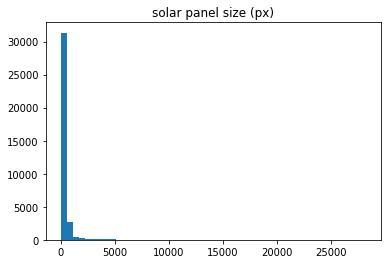

In [4]:
f = plt.figure()
plt.hist(results['cur_object_size'], bins=50)
plt.title('solar panel size (px)')

## Get the maximum confidence mask IoU

In [5]:
confidence_mat = results[['SAM_conf_0','SAM_conf_1','SAM_conf_2']].values
IoU_mat = results[['IoU_0','IoU_1','IoU_2']].values
arg_max_list = np.argmax(confidence_mat, axis=1)
print(np.shape(arg_max_list))

(35305,)


In [6]:
max_conf_IoU_list = np.zeros(len(IoU_mat))
for i in range(len(max_conf_IoU_list)):
    max_conf_IoU_list[i] = IoU_mat[i, arg_max_list[i]]
max_IoU_list = np.max(IoU_mat, axis=1)

In [7]:
print('max confidence average IoU is: ', np.mean(max_conf_IoU_list))
print('average max IoU is: ', np.mean(max_IoU_list))

max confidence average IoU is:  0.5915971600839824
average max IoU is:  0.7022247694477125


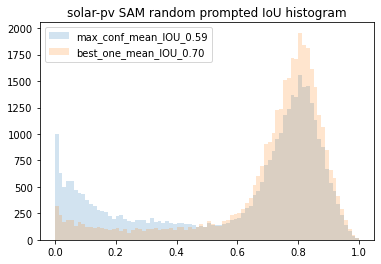

In [9]:
f = plt.figure()
plt.hist(max_conf_IoU_list, label='max_conf_mean_IOU_{:.2f}'.format(np.mean(max_conf_IoU_list)), 
        bins=80, alpha=0.2)
plt.hist(max_IoU_list, label='best_one_mean_IOU_{:.2f}'.format(np.mean(max_IoU_list)), 
        bins=80, alpha=0.2)
plt.title('solar-pv SAM {} prompted IoU histogram'.format(mode))
plt.legend()

In [17]:
np.shape(max_IoU)

(35305, 35305)